# Homework: Introduction to Generative AI with HuggingFace

Welcome to your first homework assignment on Generative AI! In this notebook, you'll explore various aspects of GenAI using HuggingFace tools and models. You'll work with text generation, translation, image generation, and audio processing.

## Objectives:
1. Set up the necessary libraries and environment
2. Experiment with text generation using GPT-2
3. Perform text translation
4. Generate images using Stable Diffusion
5. Work with audio generation and transcription

Let's get started!

## 1. Setup and Imports

First, let's install the necessary libraries and import them. Run the following cells to set up your environment.

In [2]:
!pip install -q transformers diffusers torch pydub coqui-tts openai-whisper accelerate numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 45.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 107.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 121.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 110.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 78.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.

In [3]:
import torch
from transformers import pipeline, GPT2LMHeadModel, GPT2Tokenizer
from transformers import MarianMTModel, MarianTokenizer
from diffusers import StableDiffusionPipeline
from IPython.display import Audio, display
import numpy as np
from TTS.api import TTS
import whisper

USE_CUDA = True
device = "cuda" if USE_CUDA and torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


Using device: cuda


## 2. Text Generation with GPT-2

Let's start by generating text using the GPT-2 model. You'll create a function to generate text based on a given prompt.

In [19]:
def generate_text(prompt, max_length=50):
    model_name = "gpt2-medium"
    model = GPT2LMHeadModel.from_pretrained(model_name).to(device)
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)

    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    outputs = model.generate(inputs["input_ids"], max_length=max_length, num_return_sequences=1, repetition_penalty=1.15)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Test the function
prompt = "Once upon a time in a land far, far away"
generated_text = generate_text(prompt)
print("Generated Text:")
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text:
Once upon a time in a land far, far away...

I was born to be the king of kings.


  _______________________________________________________________________________
The King's Tale by Robert Jordan (Author) and Michael Moorcock & David Weber (


### Exercise 1: Creative Writing
Generate a short story using GPT-2. Use a prompt of your choice and set the `max_length` to 100. Analyze the output and discuss any interesting patterns or unexpected results you observe.

In [23]:
# Your code here
creative_prompt = "The dog woke up and realized it had emotions"
story = generate_text(creative_prompt, max_length=100)
print(story)

# The original output for the story contains the same repeating completion of the sentence over and over.
# When I updated the generate_text function to use repetition_penalty=1.15 this repeating pattern went away, and the output mostly makes sense as a story completing the original sentence.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The dog woke up and realized it had emotions. It was a little bit scared, but then he started to get excited."
"He's been doing this for about two years now," said the owner of the pet shop in New York City who asked not be named. "I've seen him do things like that before with dogs — I think they're just more common these days because people are so used too much on their pets nowadays."


## 3. Text Translation

Now, let's work on translating text from one language to another using the MarianMT model.

In [8]:
def translate_text(text, src_lang="en", tgt_lang="es"):
    model_name = f"Helsinki-NLP/opus-mt-{src_lang}-{tgt_lang}"
    model = MarianMTModel.from_pretrained(model_name).to(device)
    tokenizer = MarianTokenizer.from_pretrained(model_name)

    inputs = tokenizer(text, return_tensors="pt", padding=True).to(device)
    translated = model.generate(**inputs)
    return tokenizer.decode(translated[0], skip_special_tokens=True)

# Test the function
text_to_translate = "Hello, how are you?"
translated_text = translate_text(text_to_translate)
print(f"Original: {text_to_translate}")
print(f"Translated: {translated_text}")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Original: Hello, how are you?
Translated: Hola, ¿cómo estás?


### Exercise 2: Multi-language Translation
Translate a sentence of your choice into three different languages. Then, translate each result back to English. Discuss any changes in meaning or nuances that occurred during the translation process.

In [22]:
# Your code here
original_sentence = "The quick brown fox jumps over the lazy dog"
languages = ["fr", "de", "es"]

for lang in languages:
    translated = translate_text(original_sentence, "en", lang)
    back_translated = translate_text(translated, lang, "en")
    print(f"{lang.upper()}: {translated}")
    print(f"Back to English: {back_translated}\n")

# In all languages, the word "quick" was replaced with "fast" which has a similar meaning, but could show a limitation in the range of vocabulary the model can use effectively.
# For Spanish and Fresh, the word "over" was replaced with the word "on" which still makes sense, but does not have the same meaning as the original sentence.
# This example shows a more significant limitation where a real miscommunication would occur if this model was being used for communication between people that speak different languages.


/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


FR: Le renard brun rapide saute sur le chien paresseux
Back to English: The fast brown fox jumps on the lazy dog

DE: Der schnelle Braunfuchs springt über den faulen Hund
Back to English: The fast brown fox jumps over the lazy dog

ES: El rápido zorro marrón salta sobre el perro perezoso
Back to English: The fast brown fox jumps on the lazy dog



## 4. Image Generation with Stable Diffusion

Let's explore image generation using the Stable Diffusion model.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

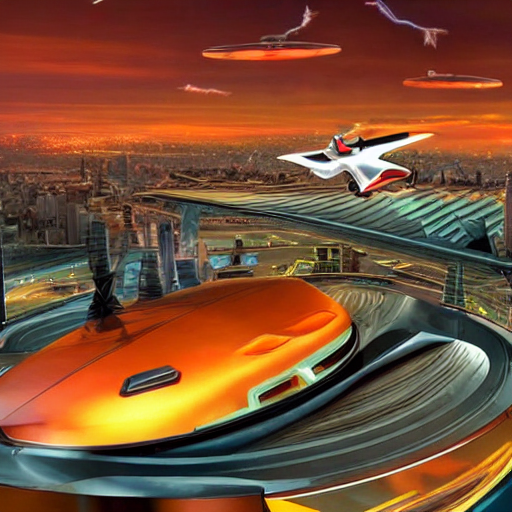

In [11]:
def generate_image(prompt, output_path="generated_image.png"):
    model_id = "runwayml/stable-diffusion-v1-5"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(device)

    image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
    image.save(output_path)
    display(image)

# Test the function
image_prompt = "A futuristic city with flying cars and a spectacular sunset"
generate_image(image_prompt)

### Exercise 3: Creative Image Generation
Generate three different images using creative prompts of your choice. For each image, describe the prompt you used and analyze how well the generated image matches your intention. Discuss any unexpected or interesting elements in the images.

Prompt 1: A user-interface for a liquid glass inspired social media application


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

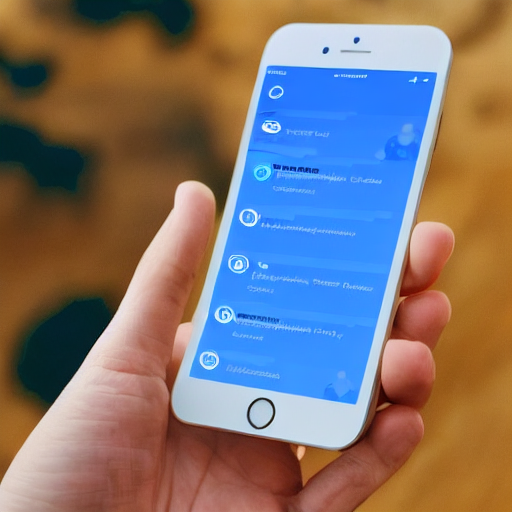



Prompt 2: The logo for a tech support company themed around video games


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

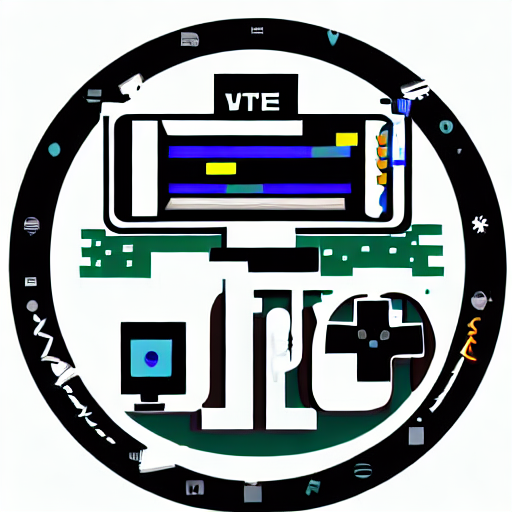



Prompt 3: A mountain landscape with the sun rising over the tallest peak


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

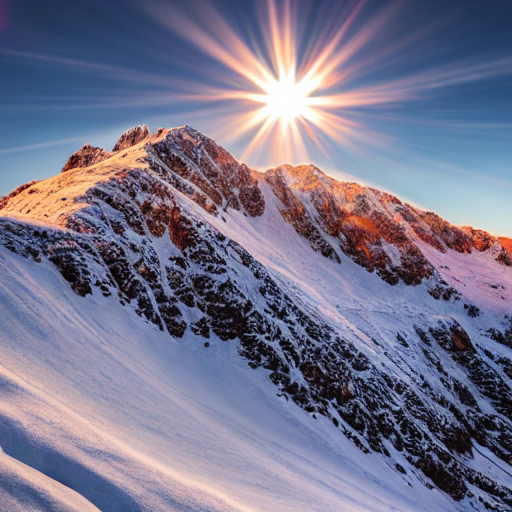

In [14]:
# Your code here
prompts = [
    "A user-interface for a liquid glass inspired social media application",
    "The logo for a tech support company themed around video games",
    "A mountain landscape with the sun rising over the tallest peak"
]

for i, prompt in enumerate(prompts):
    print(f"Prompt {i+1}: {prompt}")
    generate_image(prompt, f"image_{i+1}.png")
    print("\n")

# Prompt 1: The output for this prompt shows an app's UI, like I asked for, but instead of being only the UI, it shows the UI on a phone in someone's hand. I think this means that the training data for the model includes pictures from real life, instead of screenshots of user interfaces which shows a limitation of this model.
# Prompt 2: The AI model has generated a logo like I asked for, and you can see how it contains some tech/gaming related elements. But overall the image is not very coherent, so I think this probably shows another area where the model's training data is weak.
# Prompt 3: For this prompt I asked for a real life image, and the model did very well. The position of the sunrise is even correct in this image.



## 5. Audio Generation and Transcription

Finally, let's work with audio generation and transcription using TTS and Whisper models.

In [15]:
def generate_audio(text, output_path="output.wav"):
    tts = TTS(model_name="tts_models/en/ljspeech/tacotron2-DDC", progress_bar=True, gpu=USE_CUDA)
    tts.tts_to_file(text=text, file_path=output_path)
    display(Audio(output_path))

def transcribe_audio(file_path):
    model = whisper.load_model("base")
    result = model.transcribe(file_path)
    return result["text"]

# Test the functions
text_to_speak = "Hello, this is a test of text-to-speech conversion."
generate_audio(text_to_speak)

transcribed_text = transcribe_audio("output.wav")
print("Transcribed Text:")
print(transcribed_text)

/usr/local/lib/python3.12/dist-packages/TTS/api.py:93: UserWarning: `gpu` will be deprecated. Please use `tts.to(device)` instead.
  warnings.warn("`gpu` will be deprecated. Please use `tts.to(device)` instead.")
100%|██████████| 113M/113M [00:03<00:00, 29.1MiB/s]
100%|██████████| 3.80M/3.80M [00:00<00:00, 103MiB/s]


100%|████████████████████████████████████████| 139M/139M [00:00<00:00, 239MiB/s]


Transcribed Text:
 Hello, this is a test of text to speech conversion.


### Exercise 4: Audio Chain
Create a chain of operations:
1. Generate text using GPT-2
2. Convert that text to speech
3. Transcribe the generated audio back to text

Compare the original generated text with the final transcription. Discuss any differences and potential reasons for these differences.

In [21]:
# Your code here
original_prompt = "The future of artificial intelligence is"
generated_text = generate_text(original_prompt, max_length=50)
print("Original Generated Text:")
print(generated_text)

generate_audio(generated_text, "chain_output.wav")

transcribed_text = transcribe_audio("chain_output.wav")
print("\nTranscribed Text:")
print(transcribed_text)

# These models worked very well together, the spoken audio is completely clear and easy to understand.
# The transcript of the audio is almost completely accurate, with the correct locations of commas and other punctuation & just a couple of words wrong.
# One of the mistakes is replacing the word "are" with the word "err" which sound similar, but "err" doesn't make much sense in the sentence.
# This makes me think that the transcription model doesn't have a such a strong understanding of written language compared to the LLM that generated the original text.
# With the original generate_text function, the same message gets repeated several times in the generated text.
# I added the parameter repetition_penalty=1.15 inside generate_text and now get an output that makes a lot more sense.

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original Generated Text:
The future of artificial intelligence is in the hands and minds, not just of humans, but also machines.
 "We are at a point where we can see that AI will be able to do things like understand language," said Dr. David A


/usr/local/lib/python3.12/dist-packages/TTS/api.py:93: UserWarning: `gpu` will be deprecated. Please use `tts.to(device)` instead.
  warnings.warn("`gpu` will be deprecated. Please use `tts.to(device)` instead.")



Transcribed Text:
 the future of artificial intelligence is in the hands and minds, not just of humans, but also machines. We err at a point where we can see that A. will be able to do things like understand language, said Dr. David.


## Conclusion

Congratulations on completing this introduction to Generative AI using HuggingFace tools! In this homework, you've explored text generation, translation, image generation, and audio processing. These are fundamental tasks in the field of GenAI, and understanding how they work is crucial for developing more complex applications.

### Final Questions:
1. What was the most surprising or interesting result you encountered in any of the exercises?
2. How do you think these GenAI technologies could be applied in real-world scenarios?
3. What ethical considerations should be taken into account when using these technologies?

Please write your thoughts on these questions below:

Your reflections here:
1. I was most surprised by the quality of the third image generated for Excerise 3. The detail in the snow on the mountain and the way it catches the light from the sun is very good. This is in contrast to the first two images I asked for that are blurry and don't make much sense. I suspect that this is related to the model's training data containing more images of the real world compared to other things.
2. I think that the translation capabilities shown in Excerise 2 have some especially interesting applications when combined with text to speech and transcription models. I have tried some apps that allow you to "talk" to someone in another language by leveraging these kinds of models. If this kind of technology becomes seamless enough, I could see it having a big impact on connecting with people from around the world who don't all speak the same language.
3. When using these technologies, I think that it is critical to consider the impact that the outputs can have on other people. For example, generating images that are purposfully misleading or misuse the likeness of a real person is not okay because you will be harming other people.
